In [41]:
# Initialize Otter
import otter
grader = otter.Notebook("project.ipynb")

# Project 2 – Loan Applications 💸

## DSC 80, Fall 2024

<!-- ### Checkpoint Due Date (Questions 1 and 2): Friday, April 26th -->

### Check Point Due Date (Questions 1 and 2): Tuesday, October 22nd
### Due Date: Tuesday, October 29st


In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pd.options.plotting.backend = 'plotly'

from IPython.display import display

# DSC 80 preferred styles
pio.templates["dsc80"] = go.layout.Template(
    layout=dict(
        margin=dict(l=30, r=30, t=30, b=30),
        autosize=True,
        width=600,
        height=400,
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True),
        title=dict(x=0.5, xanchor="center"),
    )
)
pio.templates.default = "simple_white+dsc80"

import plotly.figure_factory as ff
def create_kde_plotly(df, group_col, group1, group2, vals_col, title=''):
    fig = ff.create_distplot(
        hist_data=[df.loc[df[group_col] == group1, vals_col], df.loc[df[group_col] == group2, vals_col]],
        group_labels=[group1, group2],
        show_rug=False, show_hist=False
    )
    return fig.update_layout(title=title)

In [44]:
from project import *

In [45]:
loans_path = Path('data') / 'loans.csv'
loans = pd.read_csv(loans_path)
loans.head()

,id,loan_amnt,issue_d,term,int_rate,grade,sub_grade,emp_title,verification_status,home_ownership,annual_inc,loan_status,purpose,desc,addr_state,dti,fico_range_low,fico_range_high,hardship_flag,mths_since_last_delinq
0,17965023,18000.0,Jun-2014,60 months,16.99,D,D3,sales,Source Verified,RENT,60000.0,Charged Off,debt_consolidation,NaN,MN,23.22,700.0,704.0,N,72.0
1,111414087,10000.0,Jun-2017,36 months,16.02,C,C5,mechanic,Source Verified,OWN,50000.0,Current,home_improvement,NaN,IL,6.14,680.0,684.0,N,6.0
2,95219557,12800.0,Dec-2016,36 months,7.99,A,A5,general manager,Not Verified,MORTGAGE,47500.0,Fully Paid,debt_consolidation,NaN,MO,12.89,705.0,709.0,N,66.0
3,142831837,16000.0,Oct-2018,60 months,23.40,E,E1,nurse,Source Verified,MORTGAGE,120000.0,Current,home_improvement,NaN,FL,5.66,670.0,674.0,N,NaN
4,140113255,40000.0,Sep-2018,60 months,7.84,A,A4,staff pharmacist,Verified,MORTGAGE,150000.0,Current,debt_consolidation,NaN,MN,12.24,735.0,739.0,N,NaN


Each row of the dataset corresponds to a different loan that the LendingClub approved and paid out. Some of the key columns are:
- `'loan_amnt' (float)`: the amount of the loan, or how much the borrower borrowed.
- `'issue_d' (str)`: the date on which the loan was issued.
- `'term' (str)`: the length of the loan, that is, the amount of time the borrower has to pay the loan back.
- `'int_rate' (float)`: the interest rate the borrower will pay on their loan amount.

First, it's worth exploring the distribution of loan amounts. You'll see that the largest possible loan given out through LendingClub was \\$40,000.

In [46]:
loans['loan_amnt'].describe()

count     6300.000000
mean     15568.801587
std       7398.968439
min       1000.000000
25%      10400.000000
50%      15000.000000
75%      19125.000000
max      40000.000000
Name: loan_amnt, dtype: float64

Note that when a borrower is approved for a loan, they are presented with multiple offers with different loan terms and interest rates. **Larger interest rates make the loan more expensive for the borrower – as a borrower, you want a lower interest rate!** You'll note that even for the same loan amount, different borrowers were approved for different terms and interest rates. Take a look below:

In [47]:
loans.loc[loans['loan_amnt'] == 3600, ['loan_amnt', 'term', 'int_rate']]

,loan_amnt,term,int_rate
249,3600.0,36 months,24.50
626,3600.0,36 months,13.99
1020,3600.0,36 months,11.49
2141,3600.0,36 months,10.08
2145,3600.0,36 months,5.32
2584,3600.0,36 months,16.29
2739,3600.0,36 months,8.24
3845,3600.0,36 months,13.66
4153,3600.0,36 months,12.59
4368,3600.0,36 months,14.08


So, why do different borrowers receive different terms and interest rates, despite asking for the same amount of money? The factors that influence loan offers are complex, but it's [known](https://www.bankofamerica.com/smallbusiness/resources/post/factors-that-impact-loan-decisions-and-how-to-increase-your-approval-odds/) that some of the key factors are employment status, annual income, and credit score, among other things.

In this project, we will **explore how various borrower characteristics are related to one another**, in an attempt to better understand the complexity behind loans. It's important to remember, though, that this dataset only contains information about actually approved loans, **not** all loan applications.


---

<a id='outline'></a>

### Navigating the Project 🗺

Click on the links below to navigate to different parts of the project. 


- [Part 1: Understanding Lender Decision-Making 🤔](#part1)
    - [✅ Question 1 (Checkpoint Question)](#question1)
    - [✅ Question 2 (Checkpoint Question)](#question2)
    - [Question 3](#Question-3)
    - [Question 4](#Question-4)
- [Part 2: Calculating Disposable Incomes 💰](#part2)
    - [Question 5](#Question-5)
    - [Question 6](#Question-6)
    - [Question 7](#Question-7)
    - [Question 8](#Question-8)
- [Part 3: Identifying Simpson's Paradox 🙃](#part3)
    - [Question 9](#Question-9)
    - [Question 10](#Question-10)
    
---
<!--     - [✅ Question 1 (Checkpoint Question)](#Question-1)
    - [✅ Question 2 (Checkpoint Question)](#Question-2) -->

<a id='part1'></a>

## Part 1: Understanding Lender Decision-Making 🤔

([return to the outline](#outline))

As mentioned above, the dataset we have only has information about approved loans – we don't have information about individuals who applied for loans and weren't approved. That means that we can't directly study what distinguishes successful loan applications from unsuccessful ones.

We'll start by understanding the **quantitative risks** that lenders assess when deciding what terms and interest rates to give to borrowers. Lenders typically charge higher interest rates to borrowers they perceive as high-risk. This practice serves several purposes: it offsets potential losses from unpaid debts, discourages excessively risky lending, and ensures that the higher returns from these loans can cover defaults. 

The first quantitative metric we'll look at is **debt-to-income (DTI) ratio**. Understanding the impact of such a metric on interest rates helps us in evaluating how lenders quantify risk.

<!-- The realm of lender decision-making is complex and multifaceted, influenced by a blend of traditional and non-traditional metrics. Our motivation is to delve into this domain and comprehend financial indicators, starting with: 
 -->
 
<!-- **Quantitative Risks:** Traditional metrics like **Debt-to-Income (DTI)** ratio and annual income are quantifiable and offer a concrete basis for assessing a borrower's financial health. 
 -->
<br/>

$$
\text{DTI} = \left( \frac{\text{Total Monthly Debt Payments}}{\text{Gross Monthly Income}} \right) \cdot 100 
$$

<br/>

Note that you don't need to calculate DTIs – they are already provided for us in the `'dti'` column of `loans`.


A low DTI indicates that a borrower is less likely to face financial strain from taking on additional debt, making them a lower risk to lenders. Conversely, a high DTI may signal financial overextension, suggesting a higher risk for default – that is, a higher risk that the borrower won't pay back the loan. 

When a lender perceives a higher risk of default, they often charge a higher interest rate. Let's see if this correlation is present in our dataset by looking a scatter plot of interest rate (`'int_rate'`) vs DTI (`'dti'`).

In [48]:
# Note: If the plot below doesn't appear, uncomment and run the following line.
# It will make all plotly plots render in a new browser tab.
# This is more inconvenient, but should bypass any rendering issues.

# pio.renderers.default = 'browser'

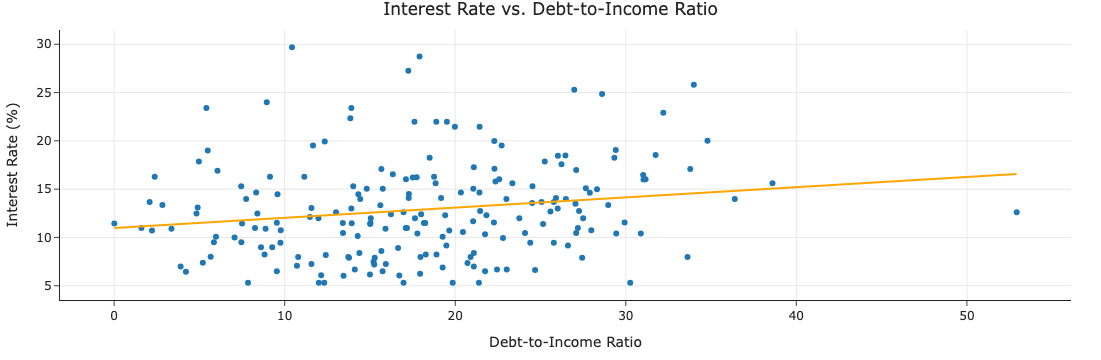

In [49]:
sample_set = loans.sample(200, random_state=1)

fig = px.scatter(sample_set, x='dti', y='int_rate', trendline='ols',
                 labels={'dti': 'Debt-to-Income Ratio', 'int_rate': 'Interest Rate (%)'},
                 trendline_color_override='orange',
                 title='Interest Rate vs. Debt-to-Income Ratio')

fig.show()

Indeed, it is!

<!-- ### ✅ Question 1 (Checkpoint Question) -->
### ✅ Question 1 (Checkpoint Question)


<a id='question1'></a>

([return to the outline](#outline))

We'll work with DTIs shortly, but first, we need to clean the dataset. Complete the implementation of the function `clean_loans`, which takes in a DataFrame like `loans` and returns a new DataFrame where:

- The `'issue_d'` column contains `pd.Timestamp` objects rather than strings.
- The `'term'` column contains ints rather than strings.
- The `'emp_title'` column is cleaned such that:
    - All employment titles are lowercase.
    - Leading and trailing whitespaces are removed.
    - The `'rn'` title is replaced with `'registered nurse'`. Note that there are other titles that include `'rn'` as part of a larger string, like `'clinical rn'` or `'attorney'`; for simplicity, **don't** replace `'rn'` in these titles with `'registered nurse'`. Instead, only replace titles that are exactly `'rn'` with `'registered nurse'`. (This means that you shouldn't use `.str.replace` to do your replacement here!)  
- There is a new column, `'term_end'`, which contains the date (as a `pd.Timestamp` object) on which each loan is fully paid.
    - ***Hint***: Use `pd.DateOffset`.

If you do the cleaning correctly, the three most common employment titles and frequencies in `loans` should be:

```py
teacher                 415
registered nurse        319
nurse                   112
```

In [50]:
loan['term'] = loan['term'].str.replace('months', '').astype(int)

In [51]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'])

loan['term_end'] = loan.apply(lambda row: row['issue_d'] + pd.DateOffset(months=row['term']), axis=1)
loan['term_end']

0      2019-06-01
1      2020-06-01
2      2019-12-01
3      2023-10-01
4      2023-09-01
          ...    
6295   2017-05-01
6296   2020-04-01
6297   2020-11-01
6298   2019-12-01
6299   2020-06-01
Name: term_end, Length: 6300, dtype: datetime64[ns]

In [52]:
loan['emp_title'].str.strip().str.lower().transform(lambda job: 'registered_nurse' if job == 'rn' else job)

0                   sales
1                mechanic
2         general manager
3                   nurse
4        staff pharmacist
              ...        
6295         senior buyer
6296     registered nurse
6297           technician
6298    software engineer
6299              teacher
Name: emp_title, Length: 6300, dtype: object

In [53]:
loan =pd.read_csv(loans_path)
loan

,id,loan_amnt,issue_d,term,int_rate,grade,sub_grade,emp_title,verification_status,home_ownership,annual_inc,loan_status,purpose,desc,addr_state,dti,fico_range_low,fico_range_high,hardship_flag,mths_since_last_delinq
0,17965023,18000.0,Jun-2014,60 months,16.99,D,D3,sales,Source Verified,RENT,60000.0,Charged Off,debt_consolidation,NaN,MN,23.22,700.0,704.0,N,72.0
1,111414087,10000.0,Jun-2017,36 months,16.02,C,C5,mechanic,Source Verified,OWN,50000.0,Current,home_improvement,NaN,IL,6.14,680.0,684.0,N,6.0
2,95219557,12800.0,Dec-2016,36 months,7.99,A,A5,general manager,Not Verified,MORTGAGE,47500.0,Fully Paid,debt_consolidation,NaN,MO,12.89,705.0,709.0,N,66.0
3,142831837,16000.0,Oct-2018,60 months,23.40,E,E1,nurse,Source Verified,MORTGAGE,120000.0,Current,home_improvement,NaN,FL,5.66,670.0,674.0,N,NaN
4,140113255,40000.0,Sep-2018,60 months,7.84,A,A4,staff pharmacist,Verified,MORTGAGE,150000.0,Current,debt_consolidation,NaN,MN,12.24,735.0,739.0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,16121830,20000.0,May-2014,36 months,6.03,A,A1,senior buyer,Verified,RENT,124000.0,Fully Paid,debt_consolidation,NaN,CA,6.91,720.0,724.0,N,54.0
6296,105091208,20000.0,Apr-2017,36 months,7.99,A,A5,registered nurse,Source Verified,OWN,220000.0,Fully Paid,debt_consolidation,NaN,CA,5.66,695.0,699.0,N,NaN
6297,63990101,10800.0,Nov-2015,60 months,18.49,E,E2,technician,Verified,OWN,35000.0,Charged Off,debt_consolidation,NaN,NY,25.39,675.0,679.0,N,39.0
6298,37641672,15000.0,Dec-2014,60 months,14.31,C,C4,software engineer,Source Verified,RENT,150000.0,Fully Paid,credit_card,NaN,CA,10.63,660.0,664.0,N,22.0


In [54]:
loan.apply(lambda row: row['issue_d'], axis=1)


0       Jun-2014
1       Jun-2017
2       Dec-2016
3       Oct-2018
4       Sep-2018
          ...   
6295    May-2014
6296    Apr-2017
6297    Nov-2015
6298    Dec-2014
6299    Jun-2015
Length: 6300, dtype: object

Run the cell below to call `clean_data` on `loans`. Make sure to run this cell before moving forward, otherwise the tests won't work correctly.

In [55]:
loans = pd.read_csv(loans_path)
loans = clean_loans(loans)
loans.head()

,id,loan_amnt,issue_d,term,int_rate,grade,sub_grade,emp_title,verification_status,home_ownership,...,loan_status,purpose,desc,addr_state,dti,fico_range_low,fico_range_high,hardship_flag,mths_since_last_delinq,term_end
0,17965023,18000.0,2014-06-01,60,16.99,D,D3,sales,Source Verified,RENT,...,Charged Off,debt_consolidation,NaN,MN,23.22,700.0,704.0,N,72.0,2019-06-01
1,111414087,10000.0,2017-06-01,36,16.02,C,C5,mechanic,Source Verified,OWN,...,Current,home_improvement,NaN,IL,6.14,680.0,684.0,N,6.0,2020-06-01
2,95219557,12800.0,2016-12-01,36,7.99,A,A5,general manager,Not Verified,MORTGAGE,...,Fully Paid,debt_consolidation,NaN,MO,12.89,705.0,709.0,N,66.0,2019-12-01
3,142831837,16000.0,2018-10-01,60,23.40,E,E1,nurse,Source Verified,MORTGAGE,...,Current,home_improvement,NaN,FL,5.66,670.0,674.0,N,NaN,2023-10-01
4,140113255,40000.0,2018-09-01,60,7.84,A,A4,staff pharmacist,Verified,MORTGAGE,...,Current,debt_consolidation,NaN,MN,12.24,735.0,739.0,N,NaN,2023-09-01


In [56]:
grader.check("q1")

q1 results: All test cases passed!

Now that we've cleaned `loans`, we can easily do things like plot the number of loans per year in `loans`:

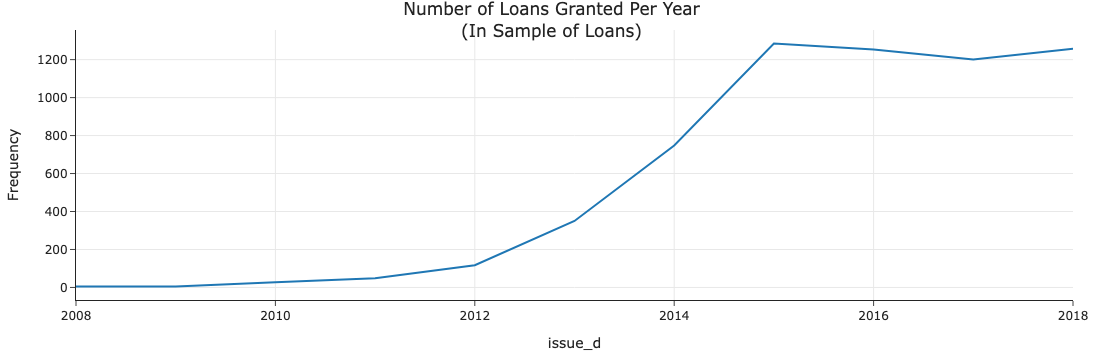

In [57]:
(
    loans['issue_d'].dt.year
    .value_counts()
    .sort_index()
    .plot(kind='line', 
          labels={'index': 'Year', 'value': 'Frequency'},
          title='Number of Loans Granted Per Year<br>(In Sample of Loans)')
    .update_layout(showlegend=False)
)

Run the cell below to call `correlations` on `loans`, to find the correlations between debt-to-income and interest rate, annual income and interest rate, and FICO credit score and interest rate. Make sure to run this cell before moving forward, otherwise the tests won't work correctly.

In [58]:
q2_correlations = correlations(loans, [
    ('dti', 'int_rate'),
    ('annual_inc', 'int_rate'),
    ('fico_range_low', 'int_rate'),
    ('term', 'int_rate')
])
q2_correlations

r_dti_int_rate               0.173465
r_annual_inc_int_rate       -0.013588
r_fico_range_low_int_rate   -0.418918
r_term_int_rate              0.383405
dtype: float64

In [59]:
grader.check("q2")

q2 results: All test cases passed!

Run the cell below to draw a bar chart of the three correlations you computed, stored in `q2_correlations`.

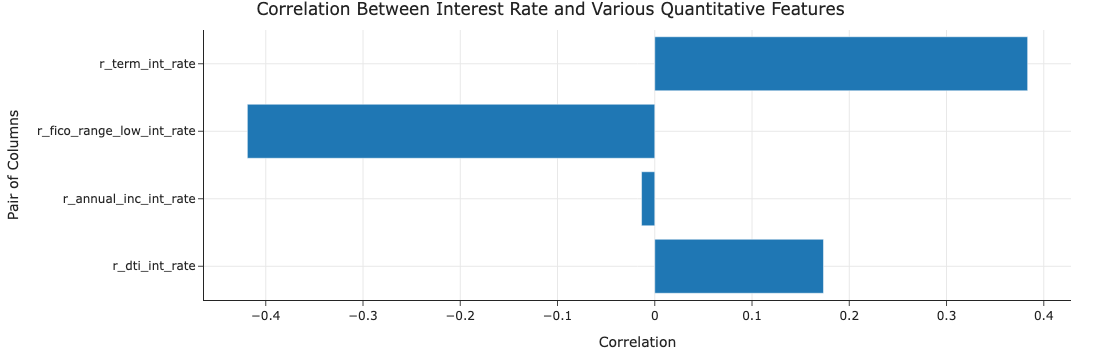

In [60]:
(
    q2_correlations
    .plot(kind='barh', 
          title='Correlation Between Interest Rate and Various Quantitative Features',
          labels={'index': 'Pair of Columns', 'value': 'Correlation'}
         )
    .update_layout(showlegend=False)
)

You should notice that of the four features analyzed, credit scores are most strongly correlated with interest rates, though term lengths also seem to be quite correlated. Let's first take a look at a scatter plot of interest rate vs. credit score.

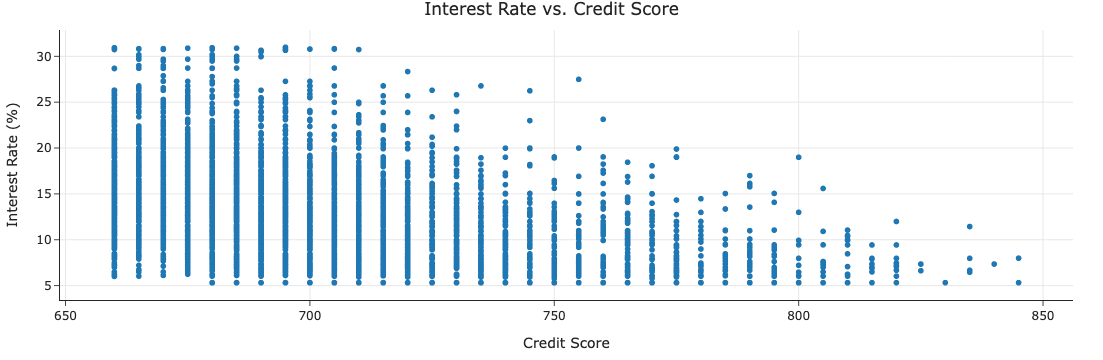

In [61]:
px.scatter(loans, x='fico_range_low', y='int_rate',
           labels={'fico_range_low': 'Credit Score', 'int_rate': 'Interest Rate (%)'},
           title='Interest Rate vs. Credit Score')

One idea is to place credit scores into categories by **binning** them. According to [Experian](https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/#s1), one of the three major credit bureaus in the US, FICO credit scores are described qualitatively as follows:

| Score | Category |
|---|---|
| 580 - 669 | Fair |
| 670 - 739 | Good |
| 740 - 799 | Very Good |
| 800 - 850 | Excellent |

There is actually also a bin below fair, named "poor" with a range of 300-579, but since `loans` doesn't have any poor credit scores, we'll exclude them from our exploration here. Note that while the `dtype` of `'fico_range_low'` is `float`, credit scores are actually integers.

Once we place credit scores into bins, we can visualize the distribution of interest rates separately for each credit score bin. Here, that would allow us to draw four separate distributions of interest rates – one for the fair group, one for the good group, one for the very good group, and one for the excellent group. Each one of those four distributions are **numerical distributions**, which we have several tools for visualizing; the most common tool you've seen is the histogram, but others exist, like the boxplot and violin plot. Let's explore this idea further!

In [62]:
import pandas as pd
import plotly.express as px

def create_boxplot(loans):

    bins = [580, 670, 740, 800, 850]
    labels = ['[580, 670)', '[670, 740)', '[740, 800)', '[800, 850)']

    
    loans['credit_score_bin'] = pd.cut(loans['fico_range_low'], bins=bins, right=False, labels=labels)


    loans['term'] = loans['term'].astype(str)


    fig = px.box(loans,
                 x='credit_score_bin',
                 y='int_rate',
                 color='term',
                 color_discrete_map={'36': 'purple', '60': 'gold'},
                 category_orders={'credit_score_bin': labels},
                 labels={
                     'int_rate': 'Interest Rate (%)',
                     'term': 'Loan Length (Months)'
                 },
                 title='Interest Rate vs. Credit Score')

    fig.update_layout(
        xaxis_title='Credit Score Range',
        yaxis_title='Interest Rate (%)',
        legend_title='Loan Length (Months)'
    )
    
    return fig


Run the cell below to draw your boxplot. If you did everything correctly, it should look like the example above. Make sure to run this cell before moving forward, otherwise the tests won't work correctly.

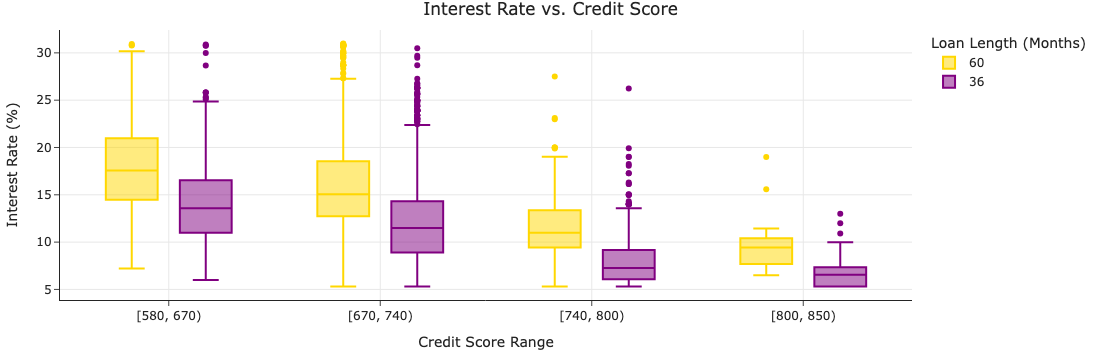

In [63]:
q3_fig = create_boxplot(loans)
q3_fig

In [64]:
grader.check("q3")

q3 results: All test cases passed!

If you created your boxplot correctly, you should have seen a few things:
- As borrowers' credit scores increase, both the median and variance in interest rates tend to decrease.
- Across the spectrum of credit scores, 60 month loans tend to have higher interest rates than 36 month loans.

You might wonder why longer loans have higher interest rates. From [The Motley Fool](https://www.fool.com/the-ascent/personal-loans/longer-repayment-terms-personal-loans-pros-cons/#:~:text=A%20longer%20term%20is%20riskier,charge%20a%20higher%20interest%20rate.):

> A longer term is riskier for the lender because there's more of a chance interest rates will change dramatically during that time. There's also more of a chance something will go wrong and you won't pay the loan back. Because it's a riskier loan to make, lenders charge a higher interest rate.

Good to know!

Now that we've investigated the role of some of the quantitative factors behind interest rates, let's look at some of the more subjective factors. Take a look at the following personal statement, for example:

> i recently proposed to my girlfriend of almost 8 yrs now and everything was going well untill our pug (ody) the middle of my three dogs started limping around and stumbling all the time. well come to find out he has a tumor on his spine. not very good news for us as our dogs are pretty much our children. so the reason for my loan request is the money i spent on the engagement ring was most of my savings and then i had to take out paydayloans loans for the mylogram bill, wich is similar to an MRI. $2,700 along with meds, visits etc.

You suspect that, perhaps, loans that included personal statements in their applications were given higher interest rates than loans that didn't include personal statements in their applications. This is true in `loans`:

,count,mean,std,min,25%,50%,75%,max
has_ps,,,,,,,,
False,5976.0,13.093203,4.908906,5.31,9.4400,12.62,15.99,30.99
True,324.0,13.676389,4.027071,5.79,11.1325,13.68,16.29,24.89


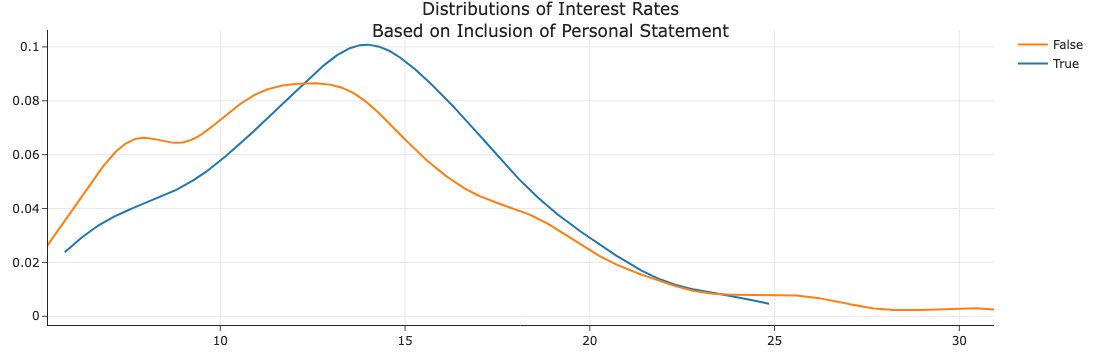

In [65]:
display(loans.assign(has_ps=loans['desc'].notna()).groupby('has_ps')['int_rate'].describe())
create_kde_plotly(
    loans.assign(has_ps=loans['desc'].notna()),
    'has_ps',
    True,
    False,
    'int_rate',
    title='Distributions of Interest Rates<br>Based on Inclusion of Personal Statement'
)

But remember, `loans` is just a sample from a much larger population of loan applications. Is this observed difference statistically significant? Let's perform a permutation test.

In [353]:
loan['has_ps'] = loan['desc'].notna()
mean_with_ps = loan[loan['has_ps']]['int_rate'].mean()
mean_without_ps = loan[loan['has_ps'] == False]['int_rate'].mean()

#difference in group means
test_stat = mean_with_ps - mean_without_ps
n=5000
permutation_diffs = []
shuffled_loans = loan.copy()

for i in range(n):
    shuffled_loans['has_ps'] = np.random.permutation(shuffled_loans['has_ps'])
    perm_ps_mean = shuffled_loans[shuffled_loans['has_ps']]['int_rate'].mean()
    perm_no_ps_mean = shuffled_loans[shuffled_loans['has_ps']==False]['int_rate'].mean()
    permutation_diff = perm_ps_mean - perm_no_ps_mean
    permutation_diffs.append(permutation_diff)

p_value = (permutation_diffs >= test_stat).mean()
p_value

np.float64(0.0178)

In [67]:
grader.check("q4")

q4 results:
    q4 - 1 result:
        Test case passed!

    q4 - 2 result:
        Trying:
            type(missingness_mechanism()) == int
        Expecting:
            True
        **********************************************************************
        Line 1, in q4 1
        Failed example:
            type(missingness_mechanism()) == int
        Expected:
            True
        Got:
            False

    q4 - 3 result:
        Trying:
            type(argument_for_nmar()) == str
        Expecting:
            True
        **********************************************************************
        Line 1, in q4 2
        Failed example:
            type(argument_for_nmar()) == str
        Expected:
            True
        Got:
            False

<a id='part2'></a>

## Part 2: Calculating Disposable Incomes 💰

([return to the outline](#outline))

In Part 1, we focused on understanding how the interest rates LendingClub chose to give to borrowers depended on different aspects of a borrower's application. In Part 2, we'll focus on understanding borrowers' **disposable incomes**, or net incomes:

$$
\text{Disposable Income} = \text{Gross Income} - \text{Federal Income Tax} - \text{State Income Tax} 
$$

This is a minor simplification, because [some cities](https://www.stlouis-mo.gov/government/departments/comptroller/initiatives/us-cities-that-levy-earnings-taxes.cfm) also collect city-specific income taxes, but we'll ignore those here. Note that the `'annual_inc'` column in `loans` contains each borrower's gross income – that is, their income before taxes are removed.

Understanding a borrower's disposable income enables lenders to evaluate a borrower's ability to meet loan obligations, ensuring that the risk of failing to pay back the loan (or **defaulting**) is minimized. In other words, knowing a borrower's disposable income allows lenders to structure loan payments in a way that aligns with the borrower's cash flow, reducing the likelihood of missed payments.

The United States, like many countries, uses a progressive tax bracket system. This means that as your earnings increase, the percentage of your earnings you owe in tax also increases. In addition, the US tax system uses marginal tax brackets – what this means is that US taxpayers pay different tax percentages on different "chunks" of their earnings.

Here's how Part 2 is structured:
- In Question 5, you'll define a general purpose function that takes in a gross income and an arbitrary tax bracket and returns the amount of tax owed.
- In Questions 6 and 7, you'll clean a DataFrame that contains tax brackets for different states so that the brackets are in a format that you can use with your function from Question 5.
- And finally, in Question 8, you'll compute the amount of disposable income each borrower has.

Let's get started!

In [68]:
def tax_owed(income, brackets):
    total = 0.0
    previous_limit = 0
    
    for rate, current_limit in brackets:
        # Calculate taxable amount in current bracket
        if income <= previous_limit:
            break  # No more taxes owed
        taxable = min(income, current_limit) - previous_limit
        total += taxable * rate
        previous_limit = current_limit
    
    return total


In [69]:
def tax_owed(income, brackets):
    total = 0.0
    for i in range(len(brackets)):
        rate, lower = brackets[i]
        # Get upper limit (next bracket's lower or infinity)
        upper = brackets[i+1][1] if i < len(brackets)-1 else float('inf')
        taxable = max(0, min(income, upper) - lower)
        total += taxable * rate
    return total    

The cell below defines the same example brackets we provided in the example above. Feel free to use them in your testing, but remember to test your functions with other brackets. Make sure to run this cell before moving forward, otherwise the tests won't work correctly.

In [70]:
example_brackets = [
 (0.1, 0), 
 (0.12, 11000), 
 (0.22, 44725), 
 (0.24, 95375), 
 (0.32, 182100),
 (0.35, 231251),
 (0.37, 578125)]
example_owed = tax_owed(75000, example_brackets)
example_owed

11807.5

In [71]:
grader.check("q5")

q5 results: All test cases passed!

Now that we have a general-purpose function that can take in a gross income and a list of tax brackets and return the tax owed, we want to use this function to compute both the **state** and **federal** taxes each loan applicant owed.

To start this process, we'll load in a DataFrame that contains the tax brackets for each state in 2023 ([source](https://taxfoundation.org/data/all/state/state-income-tax-rates-2023/)). Not all of the loan applications were submitted in 2023 – in fact, they were all submitted between 2008 and 2018 – but brackets don't change very much from year to year, so for simplicity we'll use these brackets throughout.

Run the cell below to define a DataFrame named `state_taxes_raw` with the relevant information.

In [72]:
state_taxes_raw_path = Path('data') / 'state_taxes_raw.csv'
state_taxes_raw = pd.read_csv(state_taxes_raw_path)
state_taxes_raw.head()

,State,Rate,Lower Limit
0,Ala.,2.00%,$0
1,"(a, b, c)",4.00%,$500
2,NaN,5.00%,"$3,000"
3,NaN,NaN,NaN
4,Alaska,none,NaN


As you can see, the state of the DataFrame is a bit hard to parse. The information we need is in there, but you'll need to clean 🧹 it up so that it's in the right format.

**Before proceeding, you may want to open `data/state_taxes_raw.csv` in your text editor to see how it's formatted!**

In [76]:
valid_states = [
    'Ala.', 'Alaska', 'Ariz.', 'Ark.', 'Calif.', 'Colo.', 'Conn.', 'Del.', 
    'Fla.', 'Ga.', 'Hawaii', 'Ill.', 'Ind.', 'Iowa', 'Kans.', 'Ky.', 'La.', 
    'Maine', 'Md.', 'Mass.', 'Mich.', 'Minn.', 'Miss.', 'Mo.', 'Mont.', 
    'Nebr.', 'Nev.', 'N.H.', 'N.J.', 'N.M.', 'N.Y.', 'N.C.', 'N.D.', 'Ohio', 
    'Okla.', 'Ore.', 'Pa.', 'R.I.', 'S.C.', 'S.D.', 'Tenn.', 'Tex.', 'Utah', 
    'Vt.', 'Va.', 'Wash.', 'W.Va.', 'Wis.', 'Wyo.'
    ]

In [129]:
state_taxes_raw[~state_taxes_raw['State'].isin(valid_states)]

,State,Rate,Lower Limit
1,"(a, b, c)",4.00%,$500
2,NaN,5.00%,"$3,000"
3,NaN,NaN,NaN
5,NaN,NaN,NaN
7,NaN,NaN,NaN
...,...,...,...
234,NaN,6.50%,"$40,000"
235,NaN,8.50%,"$60,000"
236,NaN,9.25%,"$250,000"
237,NaN,9.75%,"$500,000"


In [110]:
taxes = state_taxes_raw.copy()
taxes['State'] = taxes['State'].where(taxes['State'].isin(valid_states), np.nan).ffill()
taxes

,State,Rate,Lower Limit
0,Ala.,2.00%,$0
1,Ala.,4.00%,$500
2,Ala.,5.00%,"$3,000"
3,Ala.,NaN,NaN
4,Alaska,none,NaN
...,...,...,...
234,Wyo.,6.50%,"$40,000"
235,Wyo.,8.50%,"$60,000"
236,Wyo.,9.25%,"$250,000"
237,Wyo.,9.75%,"$500,000"


In [111]:
taxes['Rate'] = taxes['Rate'].replace('none', np.nan)

# Step 2: Remove '%' and convert to float
taxes['Rate'] = taxes['Rate'].str.replace('%', '').astype(float) / 100

# Step 3: Round to two decimal places
taxes['Rate'] = taxes['Rate'].round(2).fillna(0)

taxes['Rate']

0      0.02
1      0.04
2      0.05
3      0.00
4      0.00
       ... 
234    0.06
235    0.08
236    0.09
237    0.10
238    0.11
Name: Rate, Length: 239, dtype: float64

In [118]:
taxes['Lower Limit'].str.replace('$','').str.replace(',','').fillna(0).astype(int)

0            0
1          500
2         3000
3            0
4            0
        ...   
234      40000
235      60000
236     250000
237     500000
238    1000000
Name: Lower Limit, Length: 239, dtype: int64

In [250]:
def clean_state_taxes(state_taxes_raw): 

    taxes = state_taxes_raw.copy()

    def drop_empty_rows(df: pd.DataFrame):
        return df[df.isna().all(axis = 1) == False]

    def state_cleaned(df: pd.DataFrame):
        df['State'] = df['State'].astype(str).apply(lambda x: np.nan if '(' in x or 'nan' in x else x).fillna(method = 'ffill')
        return df

    def rate_cleaned(df: pd.DataFrame):

        df['Rate'] = df['Rate'].replace('none', np.nan).str.replace('%', '').fillna(0.0)

        df['Rate'] = df['Rate'].astype(float) / 100

        df['Rate'] = df['Rate'].round(2)

        return df

    def lower_limit_cleaned(df: pd.DataFrame):

        df['Lower Limit'] = df['Lower Limit'].apply(
            lambda x: int(x.replace('$', '').replace(',','')) if pd.notna(x) else 0)
        return df

    return taxes.pipe(drop_empty_rows
            ).pipe(state_cleaned
            ).pipe(rate_cleaned
            ).pipe(lower_limit_cleaned)

Run the cell below to call `clean_state_taxes` on `state_taxes_raw` to produce a new DataFrame, `state_taxes`. Make sure to run this cell before moving forward, otherwise the tests won't work correctly.

In [251]:
state_taxes_raw 

,State,Rate,Lower Limit
0,Ala.,2.00%,$0
1,"(a, b, c)",4.00%,$500
2,NaN,5.00%,"$3,000"
3,NaN,NaN,NaN
4,Alaska,none,NaN
...,...,...,...
234,NaN,6.50%,"$40,000"
235,NaN,8.50%,"$60,000"
236,NaN,9.25%,"$250,000"
237,NaN,9.75%,"$500,000"


In [252]:
state_taxes

,State,Rate,Lower Limit
0,NaN,0.02,0
1,NaN,0.04,500
2,NaN,0.05,3000
4,NaN,0.00,0
6,NaN,0.02,0
...,...,...,...
234,NaN,0.06,40000
235,NaN,0.08,60000
236,NaN,0.09,250000
237,NaN,0.10,500000


In [253]:
state_taxes_raw = pd.read_csv(state_taxes_raw_path)
state_taxes = clean_state_taxes(state_taxes_raw)
state_taxes.head()

,State,Rate,Lower Limit
0,Ala.,0.02,0
1,Ala.,0.04,500
2,Ala.,0.05,3000
4,Alaska,0.00,0
6,Ariz.,0.02,0


In [254]:
grader.check("q6")

q6 results: All test cases passed!

Moving forward, remember to refer to `state_taxes`, **not** `state_taxes_raw`.

In [260]:
loans

,id,loan_amnt,issue_d,term,int_rate,grade,sub_grade,emp_title,verification_status,home_ownership,...,loan_status,purpose,desc,addr_state,dti,fico_range_low,fico_range_high,hardship_flag,mths_since_last_delinq,term_end
0,17965023,18000.0,2014-06-01,60,16.99,D,D3,sales,Source Verified,RENT,...,Charged Off,debt_consolidation,NaN,MN,23.22,700.0,704.0,N,72.0,2019-06-01
1,111414087,10000.0,2017-06-01,36,16.02,C,C5,mechanic,Source Verified,OWN,...,Current,home_improvement,NaN,IL,6.14,680.0,684.0,N,6.0,2020-06-01
2,95219557,12800.0,2016-12-01,36,7.99,A,A5,general manager,Not Verified,MORTGAGE,...,Fully Paid,debt_consolidation,NaN,MO,12.89,705.0,709.0,N,66.0,2019-12-01
3,142831837,16000.0,2018-10-01,60,23.40,E,E1,nurse,Source Verified,MORTGAGE,...,Current,home_improvement,NaN,FL,5.66,670.0,674.0,N,NaN,2023-10-01
4,140113255,40000.0,2018-09-01,60,7.84,A,A4,staff pharmacist,Verified,MORTGAGE,...,Current,debt_consolidation,NaN,MN,12.24,735.0,739.0,N,NaN,2023-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,16121830,20000.0,2014-05-01,36,6.03,A,A1,senior buyer,Verified,RENT,...,Fully Paid,debt_consolidation,NaN,CA,6.91,720.0,724.0,N,54.0,2017-05-01
6296,105091208,20000.0,2017-04-01,36,7.99,A,A5,registered nurse,Source Verified,OWN,...,Fully Paid,debt_consolidation,NaN,CA,5.66,695.0,699.0,N,NaN,2020-04-01
6297,63990101,10800.0,2015-11-01,60,18.49,E,E2,technician,Verified,OWN,...,Charged Off,debt_consolidation,NaN,NY,25.39,675.0,679.0,N,39.0,2020-11-01
6298,37641672,15000.0,2014-12-01,60,14.31,C,C4,software engineer,Source Verified,RENT,...,Fully Paid,credit_card,NaN,CA,10.63,660.0,664.0,N,22.0,2019-12-01


In [317]:
def combine_loans_and_state_taxes(loans, state_taxes):
    import json
    from pathlib import Path

    # Load the state mapping JSON file
    state_mapping_path = Path('data') / 'state_mapping.json'
    with open(state_mapping_path, 'r') as f:
        state_mapping = json.load(f)

    # Map state names to abbreviations
    state_taxes['State'] = state_taxes['State'].map(state_mapping)

    # Create state tax brackets DataFrame
    state_tax_brackets = state_brackets(state_taxes)

    # Merge loans with state tax brackets
    loans_taxes = loans.rename(columns={'addr_state': 'State'}).merge(
        state_tax_brackets, on='State', how='left'
    )

    # Replace missing or invalid bracket_list values with an empty list
    loans_taxes['bracket_list'] = loans_taxes['bracket_list'].apply(
        lambda x: x if isinstance(x, list) else []
    )

    return loans_taxes

Run the cell below to call `combine_loans_and_state_taxes` on `loans` and `state_taxes` to produce a new DataFrame, `loans_with_state_taxes`. Make sure to run this cell before moving forward, otherwise the tests won't work correctly.

In [318]:
loans = clean_loans(pd.read_csv(loans_path))
state_taxes = clean_state_taxes(pd.read_csv(state_taxes_raw_path))
loans_with_state_taxes = combine_loans_and_state_taxes(loans, state_taxes)
loans_with_state_taxes.head()

,id,loan_amnt,issue_d,term,int_rate,grade,sub_grade,emp_title,verification_status,home_ownership,...,purpose,desc,State,dti,fico_range_low,fico_range_high,hardship_flag,mths_since_last_delinq,term_end,bracket_list
0,17965023,18000.0,2014-06-01,60,16.99,D,D3,sales,Source Verified,RENT,...,debt_consolidation,NaN,MN,23.22,700.0,704.0,N,72.0,2019-06-01,"[(0.05, 0), (0.07, 30070), (0.08, 98760), (0.1..."
1,111414087,10000.0,2017-06-01,36,16.02,C,C5,mechanic,Source Verified,OWN,...,home_improvement,NaN,IL,6.14,680.0,684.0,N,6.0,2020-06-01,"[(0.05, 0)]"
2,95219557,12800.0,2016-12-01,36,7.99,A,A5,general manager,Not Verified,MORTGAGE,...,debt_consolidation,NaN,MO,12.89,705.0,709.0,N,66.0,2019-12-01,"[(0.02, 1121), (0.02, 2242), (0.03, 3363), (0...."
3,142831837,16000.0,2018-10-01,60,23.40,E,E1,nurse,Source Verified,MORTGAGE,...,home_improvement,NaN,FL,5.66,670.0,674.0,N,NaN,2023-10-01,"[(0.0, 0)]"
4,140113255,40000.0,2018-09-01,60,7.84,A,A4,staff pharmacist,Verified,MORTGAGE,...,debt_consolidation,NaN,MN,12.24,735.0,739.0,N,NaN,2023-09-01,"[(0.05, 0), (0.07, 30070), (0.08, 98760), (0.1..."


In [319]:
grader.check("q7")

q7 results: All test cases passed!

In [359]:
def find_disposable_income(loans_with_state_taxes):

    FEDERAL_BRACKETS = [
        (0.1, 0), 
        (0.12, 11000), 
        (0.22, 44725), 
        (0.24, 95375), 
        (0.32, 182100),
        (0.35, 231251),
        (0.37, 578125)
    ]

    df = loans_with_state_taxes.copy()

    # Calculate federal tax owed
    df['federal_tax_owed'] = df['annual_inc'].apply(lambda inc: tax_owed(inc, FEDERAL_BRACKETS))

    # Calculate state tax owed using the corresponding state's tax brackets
    df['state_tax_owed'] = df.apply(lambda row: tax_owed(row['annual_inc'], row['bracket_list']), axis=1)

    # Calculate disposable income
    df['disposable_income'] = df['annual_inc'] - df['federal_tax_owed'] - df['state_tax_owed']

    return df

In [360]:
loans_with_state_taxes['bracket_list']

0       [(0.05, 0), (0.07, 30070), (0.08, 98760), (0.1...
1                                             [(0.05, 0)]
2       [(0.02, 1121), (0.02, 2242), (0.03, 3363), (0....
3                                              [(0.0, 0)]
4       [(0.05, 0), (0.07, 30070), (0.08, 98760), (0.1...
                              ...                        
6295    [(0.01, 0), (0.02, 10099), (0.04, 23942), (0.0...
6296    [(0.01, 0), (0.02, 10099), (0.04, 23942), (0.0...
6297    [(0.04, 0), (0.04, 8500), (0.05, 11700), (0.06...
6298    [(0.01, 0), (0.02, 10099), (0.04, 23942), (0.0...
6299                                           [(0.0, 0)]
Name: bracket_list, Length: 6300, dtype: object

Run the cell below to call `find_disposable_income` on `loans_with_state_taxes` to produce a new DataFrame, `with_disposable_income`. Make sure to run this cell before moving forward, otherwise the tests won't work correctly.

In [361]:
with_disposable_income = find_disposable_income(loans_with_state_taxes)
with_disposable_income.head()

,id,loan_amnt,issue_d,term,int_rate,grade,sub_grade,emp_title,verification_status,home_ownership,...,dti,fico_range_low,fico_range_high,hardship_flag,mths_since_last_delinq,term_end,bracket_list,federal_tax_owed,state_tax_owed,disposable_income
0,17965023,18000.0,2014-06-01,60,16.99,D,D3,sales,Source Verified,RENT,...,23.22,700.0,704.0,N,72.0,2019-06-01,"[(0.05, 0), (0.07, 30070), (0.08, 98760), (0.1...",8507.5,3598.60,47893.90
1,111414087,10000.0,2017-06-01,36,16.02,C,C5,mechanic,Source Verified,OWN,...,6.14,680.0,684.0,N,6.0,2020-06-01,"[(0.05, 0)]",6307.5,2500.00,41192.50
2,95219557,12800.0,2016-12-01,36,7.99,A,A5,general manager,Not Verified,MORTGAGE,...,12.89,705.0,709.0,N,66.0,2019-12-01,"[(0.02, 1121), (0.02, 2242), (0.03, 3363), (0....",5757.5,2195.64,39546.86
3,142831837,16000.0,2018-10-01,60,23.40,E,E1,nurse,Source Verified,MORTGAGE,...,5.66,670.0,674.0,N,NaN,2023-10-01,"[(0.0, 0)]",22200.0,0.00,97800.00
4,140113255,40000.0,2018-09-01,60,7.84,A,A4,staff pharmacist,Verified,MORTGAGE,...,12.24,735.0,739.0,N,NaN,2023-09-01,"[(0.05, 0), (0.07, 30070), (0.08, 98760), (0.1...",29400.0,10411.00,110189.00


In [362]:
grader.check("q8")

q8 results: All test cases passed!

Nice work! To wrap up this section, we'll show you one of the many visualizations you can create using the calculations you just did.

All you need to do here is read through the cell below, try and understand the code, run the cell, and look at the resulting visualization. What trends do you notice?

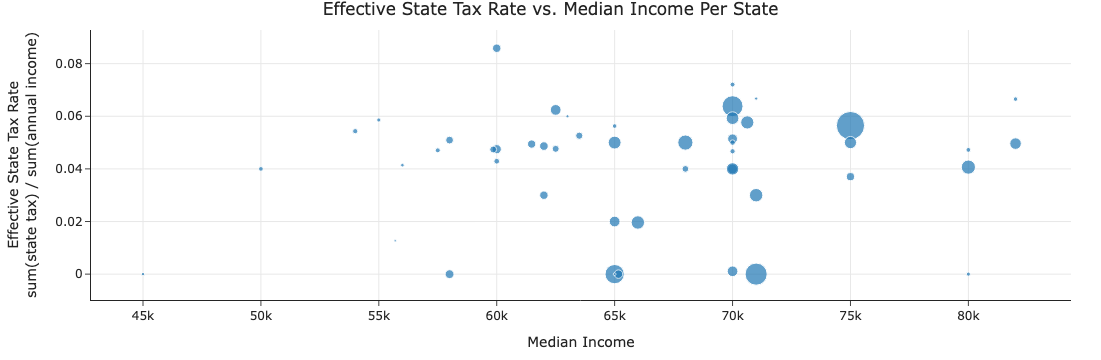

In [272]:
effective_tax_per_state = (
    with_disposable_income
    .groupby('State')
    .apply(lambda df: df['state_tax_owed'].sum() / df['annual_inc'].sum())
)

median_income = (
    with_disposable_income
    .groupby('State')
    ['annual_inc']
    .median()
)

(
    pd.DataFrame()
    .assign(
        effective_tax_per_state=effective_tax_per_state, 
        median_income=median_income,
        count=with_disposable_income.value_counts('State')
    )
    .reset_index()
    .plot(
        kind='scatter',
        x='median_income',
        y='effective_tax_per_state',
        hover_name='State',
        size='count',
        title='Effective State Tax Rate vs. Median Income Per State',
        labels={
            'median_income': 'Median Income',
            'effective_tax_per_state': 'Effective State Tax Rate<br>sum(state tax) / sum(annual income)',
            'count': 'Number of Borrowers'
        }
    )
)

<a id='part3'></a>

## Part 3: Identifying Simpson's Paradox 🙃

([return to the outline](#outline))

In [Lecture 4](https://dsc80.com/resources/lectures/lec04/lec04-filled.html), we introduced the idea of Simpson's Paradox, which occurs when grouped data and ungrouped data show opposing trends. In this final part of the project, we'll try and identify instances of Simpson's Paradox in `loans`.

In [336]:
def aggregate_and_combine(loans, keywords, quantitative_column, categorical_column):
    df = pd.DataFrame()

    for keyword in keywords:

        keyword_filter = loans['emp_title'].str.contains(keyword, na=False)
        
        means = loans[keyword_filter].groupby(categorical_column)[quantitative_column].mean()

        overall_mean = loans[keyword_filter][quantitative_column].mean()

        means['Overall'] = overall_mean
        
        means.name = f"{keyword}_mean_{quantitative_column}"
    
        df = pd.concat([df, means], axis=1)

    return df

Run the cell below to call `aggregate_and_combine` to find the mean loan amounts given to those with `'engineer'` in their job title and `'nurse'` in their job title, both overall and separately for each home ownership status. Make sure to run this cell before moving forward, otherwise the tests won't work correctly.

In [337]:
eng_nurse_loan_home = aggregate_and_combine(loans, ['engineer', 'nurse'], 'loan_amnt', 'home_ownership')
eng_nurse_loan_home

,engineer_mean_loan_amnt,nurse_mean_loan_amnt
MORTGAGE,18007.425743,16374.887892
OWN,19980.693069,19381.661184
RENT,15002.312500,14358.863636
Overall,16341.735880,17461.695447


In [335]:
grader.check("q9")

q9 results: All test cases passed!

Let's look at `eng_nurse_loan_home` once again:

In [330]:
eng_nurse_loan_home

,engineer_mean_loan_amnt,nurse_mean_loan_amnt
home_ownership,,
MORTGAGE,18007.425743,16374.887892
OWN,19980.693069,19381.661184
RENT,15002.312500,14358.863636
Overall,16341.735880,17461.695447


**Pay close attention – if you implemented everything correctly, you should see an instance of Simpson's Paradox above!** Across all three categories of home ownership status – `'MORTGAGE'`, `'OWN'`, and `'RENT'` – those with `'engineer'` in their job title received **higher** loan amounts on average than those with `'nurse'` in their job title. But, the average loan amount given to those with `'engineer'` in their job title was **lower** than the average amount given to those with `'nurse'` in their job title.

In [292]:
loans

,id,loan_amnt,issue_d,term,int_rate,grade,sub_grade,emp_title,verification_status,home_ownership,...,loan_status,purpose,desc,addr_state,dti,fico_range_low,fico_range_high,hardship_flag,mths_since_last_delinq,term_end
0,17965023,18000.0,2014-06-01,60,16.99,D,D3,sales,Source Verified,RENT,...,Charged Off,debt_consolidation,NaN,MN,23.22,700.0,704.0,N,72.0,2019-06-01
1,111414087,10000.0,2017-06-01,36,16.02,C,C5,mechanic,Source Verified,OWN,...,Current,home_improvement,NaN,IL,6.14,680.0,684.0,N,6.0,2020-06-01
2,95219557,12800.0,2016-12-01,36,7.99,A,A5,general manager,Not Verified,MORTGAGE,...,Fully Paid,debt_consolidation,NaN,MO,12.89,705.0,709.0,N,66.0,2019-12-01
3,142831837,16000.0,2018-10-01,60,23.40,E,E1,nurse,Source Verified,MORTGAGE,...,Current,home_improvement,NaN,FL,5.66,670.0,674.0,N,NaN,2023-10-01
4,140113255,40000.0,2018-09-01,60,7.84,A,A4,staff pharmacist,Verified,MORTGAGE,...,Current,debt_consolidation,NaN,MN,12.24,735.0,739.0,N,NaN,2023-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,16121830,20000.0,2014-05-01,36,6.03,A,A1,senior buyer,Verified,RENT,...,Fully Paid,debt_consolidation,NaN,CA,6.91,720.0,724.0,N,54.0,2017-05-01
6296,105091208,20000.0,2017-04-01,36,7.99,A,A5,registered nurse,Source Verified,OWN,...,Fully Paid,debt_consolidation,NaN,CA,5.66,695.0,699.0,N,NaN,2020-04-01
6297,63990101,10800.0,2015-11-01,60,18.49,E,E2,technician,Verified,OWN,...,Charged Off,debt_consolidation,NaN,NY,25.39,675.0,679.0,N,39.0,2020-11-01
6298,37641672,15000.0,2014-12-01,60,14.31,C,C4,software engineer,Source Verified,RENT,...,Fully Paid,credit_card,NaN,CA,10.63,660.0,664.0,N,22.0,2019-12-01


In [350]:
def exists_paradox(loans, keywords, quantitative_column, categorical_column):

    aggregated = aggregate_and_combine(loans, keywords, quantitative_column, categorical_column)

    paradox_found = ((aggregated.iloc[:-1, 0] > aggregated.iloc[:-1, 1]).all() and
            (aggregated.iloc[-1, 0] < aggregated.iloc[-1, 1]))
    

    return bool(paradox_found)


def paradox_example(loans):

    keywords = [['manager', 'assistant'], ['doctor', 'teacher'], ['developer', 'analyst']]
    quant_cols = ['loan_amnt', 'int_rate', 'annual_inc']
    categ_cols = ['home_ownership', 'verification_status', 'term']

    for keyword_pair in keywords:
        for quant_col in quant_cols:
            for categ_col in categ_cols:
                if exists_paradox(loans, keyword_pair, quant_col, categ_col):
                    return {
                        'loans': loans,
                        'keywords': keyword_pair,
                        'quantitative_column': quant_col,
                        'categorical_column': categ_col
                    }
    return None

If you implemented `exists_paradox` correctly, then `exists_paradox(**paradox_example(loans))` should return `True`. Remember to not just copy the arguments from Question 9.

In [351]:
exists_paradox(**paradox_example(loans))

True

In [352]:
grader.check("q10")

q10 results: All test cases passed!

Congrats! You're done with the project.

The `loans` dataset is rich, and we've just barely scratched the surface in exploring it. We encourage you to keep digging deeper. Just to illustrate what's possible, run the cell below to create a line plot that depcits the number of loans approved per year for each loan purpose (car loan, medical debt, etc.).

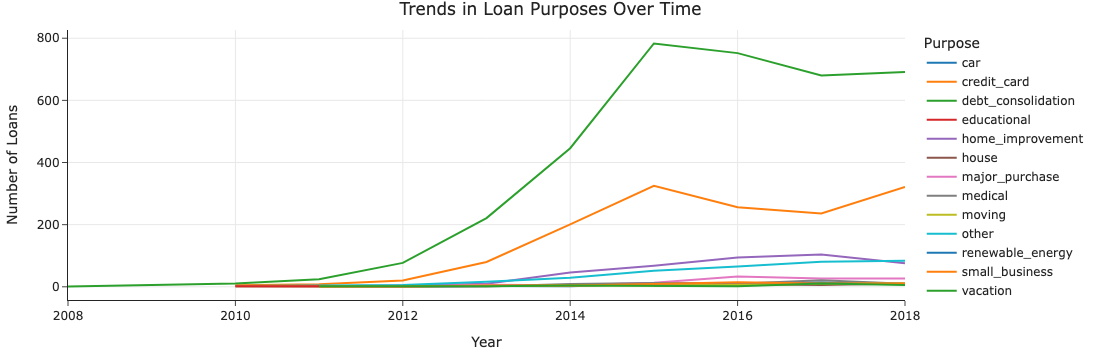

In [284]:
def loan_purpose_over_time(loans):
    loans = loans.copy()
    loan_purpose_yearly = loans.groupby([loans['issue_d'].dt.year, 'purpose']).size().unstack()
    loan_purpose_yearly = loan_purpose_yearly.reset_index().melt(id_vars='issue_d', var_name='Purpose', value_name='Frequency')
    
    fig = px.line(loan_purpose_yearly, x='issue_d', y='Frequency', color='Purpose', title='Trends in Loan Purposes Over Time')
    fig.update_xaxes(title_text='Year')
    fig.update_yaxes(title_text='Number of Loans')
    return fig

loan_purpose_over_time(loans)

## Congratulations, you've finished Project 2! 🎉

As a reminder, all of the work you want to submit needs to be in `project.py`.

To ensure that all of the work you want to submit is in `project.py`, we've included a script named `project-validation.py` in the project folder. You shouldn't edit it, but instead, you should call it from the command line (e.g. the Terminal) to test your work.

Once you've finished the project, you should open the command line and run, in the directory for this project:

```
python project-validation.py
```

**This will run all of the `grader.check` cells that you see in this notebook, but only using the code in `project.py` – that is, it doesn't look at any of the code in this notebook. If all of your `grader.check` cells pass in this notebook but not all of them pass in your command line with the above command, then you likely have code in your notebook that isn't in your `project.py`!**

You can also use `project-validation.py` to test individual questions. For instance,

```
python project-validation.py q1 q4 q7 q8
```

will run the `grader.check` cells for Questions 1, 4, 7, and 8 – again, only using the code in `project.py`.

Once `python project-validation.py` shows that you're passing all test cases, you're ready to submit your `project.py` (and only your `project.py`) to Gradescope. Once submitting to Gradescope, make sure to stick around until all test cases pass.

There is also a call to `grader.check_all()` below in _this_ notebook, but make sure to also follow the steps above.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [363]:
grader.check_all()

q1 results:
    q1 - 1 result:
        Trying:
            isinstance(loans, pd.DataFrame) and loans.shape == (6300, 21)
        Expecting:
            True
        **********************************************************************
        Line 1, in q1 0
        Failed example:
            isinstance(loans, pd.DataFrame) and loans.shape == (6300, 21)
        Expected:
            True
        Got:
            False

    q1 - 2 result:
        Test case passed!

    q1 - 3 result:
        Test case passed!

q10 results: All test cases passed!

q2 results: All test cases passed!

q3 results: All test cases passed!

q4 results:
    q4 - 1 result:
        Test case passed!

    q4 - 2 result:
        Test case passed!

    q4 - 3 result:
        Trying:
            type(argument_for_nmar()) == str
        Expecting:
            True
        **********************************************************************
        Line 1, in q4 2
        Failed example:
            type(argument_f